# Mapping homicides, by state

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Crime map
##### What's the murder rate by state?

In [4]:
# Values: https://raw.githubusercontent.com/stiles/usc/main/data/processed/homicide-rates-states.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/states.geojson

#### Read state-level homicide data

In [5]:
hom_rates = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/usc/main/data/processed/homicide-rates-states.csv"
)

In [6]:
hom_rates.head()

,year,state,rate,deaths,url,name,usps,ap
0,2020,AL,14.2,654,/nchs/pressroom/states/alabama/al.htm,Alabama,AL,Ala.
1,2020,AK,7.3,55,/nchs/pressroom/states/alaska/ak.htm,Alaska,AK,Alaska
2,2020,AZ,7.5,525,/nchs/pressroom/states/arizona/az.htm,Arizona,AZ,Ariz.
3,2020,AR,13.0,371,/nchs/pressroom/states/arkansas/ar.htm,Arkansas,AR,Ark.
4,2020,CA,6.1,2368,/nchs/pressroom/states/california/ca.htm,California,CA,Calif.


In [7]:
hom_rates.sort_values("deaths", ascending=False).head()

,year,state,rate,deaths,url,name,usps,ap
4,2020,CA,6.1,2368,/nchs/pressroom/states/california/ca.htm,California,CA,Calif.
42,2020,TX,7.6,2212,/nchs/pressroom/states/texas/tx.htm,Texas,TX,Texas
8,2020,FL,7.8,1530,/nchs/pressroom/states/florida/fl.htm,Florida,FL,Fla.
12,2020,IL,11.2,1353,/nchs/pressroom/states/illinois/il.htm,Illinois,IL,Ill.
9,2020,GA,10.5,1093,/nchs/pressroom/states/georgia/ga.htm,Georgia,GA,Ga.


#### Read state-level geo file

In [8]:
geo = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/states.geojson"
)

In [9]:
geo.head()

,state_fips,state_name,geometry
0,01,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,02,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,04,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,05,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,06,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


#### Filter: Just map the mainland

<AxesSubplot:>

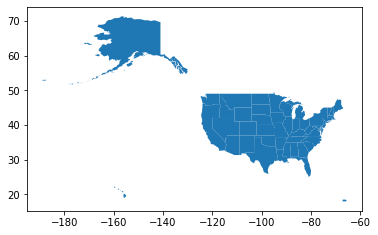

In [10]:
geo.plot()

In [11]:
extras = ["Hawaii", "Alaska", "Puerto Rico"]

<AxesSubplot:>

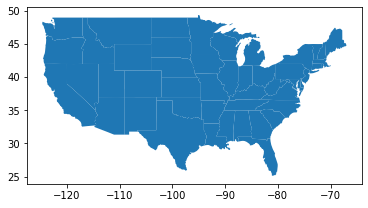

In [12]:
mainland = geo[~geo["state_name"].isin(extras)]
mainland.plot()

#### Merge the two

In [13]:
homicide_state = pd.merge(mainland, hom_rates, left_on="state_name", right_on="name")

In [14]:
homicide_state.head()

,state_fips,state_name,geometry,year,state,rate,deaths,url,name,usps,ap
0,01,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2020,AL,14.2,654,/nchs/pressroom/states/alabama/al.htm,Alabama,AL,Ala.
1,04,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",2020,AZ,7.5,525,/nchs/pressroom/states/arizona/az.htm,Arizona,AZ,Ariz.
2,05,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",2020,AR,13.0,371,/nchs/pressroom/states/arkansas/ar.htm,Arkansas,AR,Ark.
3,06,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",2020,CA,6.1,2368,/nchs/pressroom/states/california/ca.htm,California,CA,Calif.
4,08,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",2020,CO,5.8,336,/nchs/pressroom/states/colorado/co.htm,Colorado,CO,Colo.


<AxesSubplot:>

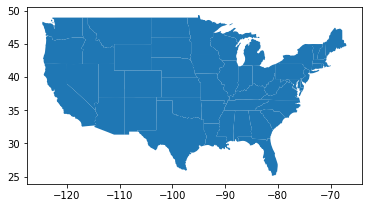

In [15]:
homicide_state.plot()

#### Export merged geo file

In [16]:
homicide_state.to_file(
    "../data/processed/homicide_rates_per_state.geojson", driver="GeoJSON"
)